In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

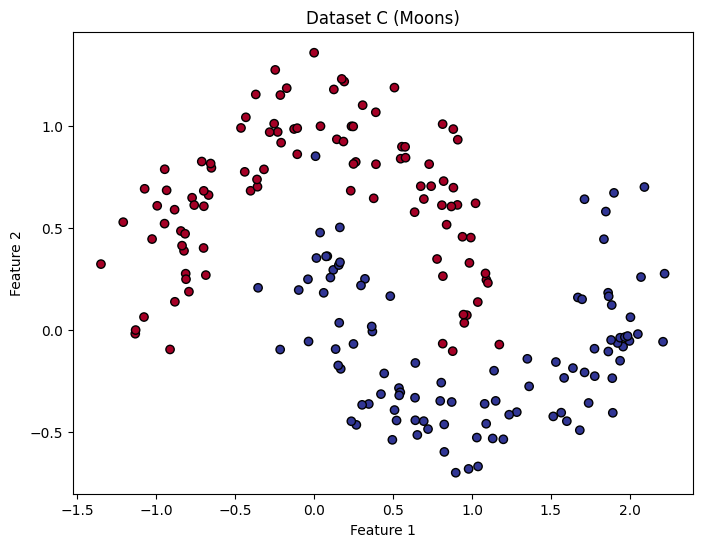

In [2]:
# Generate the dataset
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

# Reshape y to be a column vector (m, 1) instead of a row vector (m,)
# This is a common practice that simplifies matrix operations later on.
y = y.reshape(-1, 1)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title('Dataset C (Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [3]:
def cost_function(y_true, y_pred):
    """
    Calculates the Mean Squared Error cost.
    
    Args:
        y_true (np.array): Array of true labels, shape (m, 1).
        y_pred (np.array): Array of predicted labels, shape (m, 1).
        
    Returns:
        float: The mean squared error.
    """
    # Your implementation here
    # Hint: m is the number of samples, which is the length of y_true.
    m = len(y_true)
    cost = np.sum((y_true - y_pred)**2)/m
    
    return cost

In [4]:
def initialize_weights(input_dim):
    """
    Initializes weights with small random numbers and bias with zero.
    
    Args:
        input_dim (int): The number of features in the input data (e.g., 2 for our dataset).
        
    Returns:
        tuple: A tuple containing:
            - weights (np.array): A weight vector of shape (input_dim, 1).
            - bias (float): A scalar bias term, initialized to 0.
    """
    # Your implementation here

    weights = 0.1*np.random.randn(input_dim,1)
    bias = 0.0 # Replace
    
    return weights, bias

In [5]:
def sigmoid(x):
    """
    Computes the sigmoid function.
    
    Args:
        x (np.array or float): Input value(s).
        
    Returns:
        np.array or float: The sigmoid of x.
    """
    out = 1/(1 + np.exp(-x))
    return out

In [6]:
def forward_pass(X, weights, bias):
    """
    Computes the forward pass of the neuron.
    
    Args:
        X (np.array): Input data, shape (m, n_features).
        weights (np.array): Weight vector, shape (n_features, 1).
        bias (float): Bias term.
        
    Returns:
        tuple: A tuple containing:
            - z (np.array): The linear combination, shape (m, 1).
            - y_pred (np.array): The prediction (activation), shape (m, 1).
    """
    # Your implementation here
    # Hint: Use the correct operation (scalar product) for multiplying X and weights
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    
    return z, y_pred

In [7]:
def calculate_gradients(X, y_true, y_pred):
    """
    Calculates the gradients of the cost function w.r.t. weights and bias.
    
    Args:
        X (np.array): Input data, shape (m, n_features).
        y_true (np.array): True labels, shape (m, 1).
        y_pred (np.array): Predicted labels, shape (m, 1).
        
    Returns:
        tuple: A tuple containing:
            - dW (np.array): Gradient w.r.t. weights, shape (n_features, 1).
            - db (float): Gradient w.r.t. bias.
    """
    
    # Your implementation here
    # Hint: Use the formulas above. X.T is the transpose of X.
    # The error term is (y_true - y_pred).
    error = y_true - y_pred
    dW = -2 * np.dot(X.T, error) * y_pred.reshape(-1,) * (1 - y_pred).reshape(-1,)
    dW = np.mean(dW, axis=1).reshape(-1, 1)  # Average over all samples
    db = 0 # ignore bias updates
    
    return dW, db

In [8]:
def update_weights(weights, bias, dW, db, learning_rate):
    """
    Updates the weights and bias using the gradient descent rule.
    
    Args:
        weights (np.array): Current weights.
        bias (float): Current bias.
        dW (np.array): Gradient of weights.
        db (float): Gradient of bias.
        learning_rate (float): The learning rate alpha.
        
    Returns:
        tuple: A tuple containing the updated weights and bias.
    """
    # Your implementation here
    weights = weights - learning_rate*dW
    bias = bias - learning_rate*db
    
    return weights, bias

In [9]:
def train_neuron(X, y, learning_rate, num_epochs):
    """
    Trains a single neuron using gradient descent.
    
    Args:
        X (np.array): Input data.
        y (np.array): True labels.
        learning_rate (float): The learning rate.
        num_epochs (int): The number of passes through the dataset.
        
    Returns:
        tuple: A tuple containing:
            - trained_weights (np.array): The final learned weights.
            - trained_bias (float): The final learned bias.
            - cost_history (list): A list of cost values at each epoch.
    """
    input_dim = X.shape[1]
    
    # 1. Initialize weights and bias
    weights, bias = initialize_weights(input_dim)
    cost_history = []
    
    # 2. Loop for num_epochs
    for i in range(num_epochs):
        # a. Forward Pass
        z, y_pred = forward_pass(X, weights, bias)
        
        # b. Calculate Cost (and append to history)
        cost = cost_function(y, y_pred)
        cost_history.append(cost)
        
        # c. Calculate Gradients (Backward Pass)
        dW, db = calculate_gradients(X, y, y_pred)
        
        # d. Update Weights
        weights, bias = update_weights(weights, bias, dW, db, learning_rate)
        
        # Optional: Print cost every 100 epochs to check progress
        if i % 100 == 0:
            print(f"Epoch {i}, Cost: {cost}")
            
    return weights, bias, cost_history

In [10]:
learning_rate = 0.01
num_epochs = 10000

# Train the model
trained_weights, trained_bias, cost_history = train_neuron(X, y, learning_rate, num_epochs)

print("\n--- Training Complete ---")
print(f"Final Weights: \n{trained_weights}")
print(f"Final Bias: {trained_bias}")

Epoch 0, Cost: 0.2536632190600247
Epoch 100, Cost: 0.0982706658861273
Epoch 200, Cost: 0.09815941456319774
Epoch 300, Cost: 0.09845913589772617
Epoch 400, Cost: 0.09867062977715872
Epoch 500, Cost: 0.09879987158533744
Epoch 600, Cost: 0.09887643789180575
Epoch 700, Cost: 0.09892136879156715
Epoch 800, Cost: 0.09894764261761967
Epoch 900, Cost: 0.09896298362405148
Epoch 1000, Cost: 0.09897193481428024
Epoch 1100, Cost: 0.09897715582145519
Epoch 1200, Cost: 0.09898020053231431
Epoch 1300, Cost: 0.09898197591808228
Epoch 1400, Cost: 0.09898301109358514
Epoch 1500, Cost: 0.09898361465393904
Epoch 1600, Cost: 0.09898396655376182
Epoch 1700, Cost: 0.09898417172314003
Epoch 1800, Cost: 0.09898429134298095
Epoch 1900, Cost: 0.09898436108463776
Epoch 2000, Cost: 0.09898440174585237
Epoch 2100, Cost: 0.09898442545237626
Epoch 2200, Cost: 0.09898443927387333
Epoch 2300, Cost: 0.0989844473321487
Epoch 2400, Cost: 0.09898445203032179
Epoch 2500, Cost: 0.09898445476947203
Epoch 2600, Cost: 0.0989844

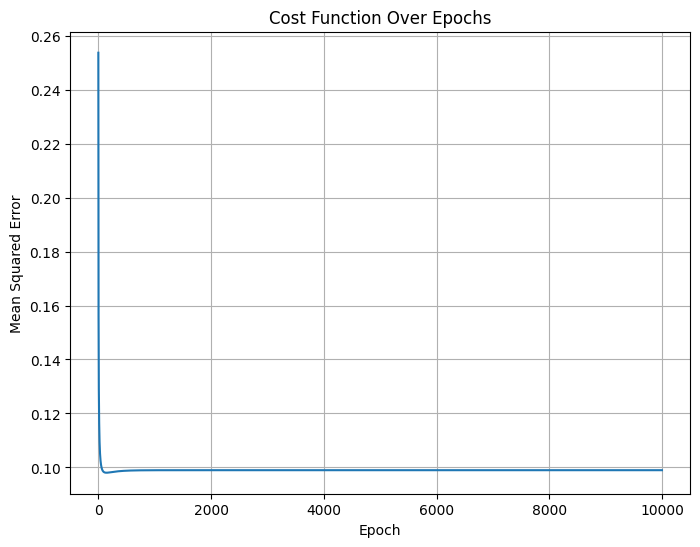

In [11]:
# Plot the cost history
plt.figure(figsize=(8, 6))
plt.plot(cost_history)
plt.title('Cost Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [12]:
def evaluate_neuron(X, y, trained_weights, trained_bias):
    """
    Evaluates the accuracy of the trained neuron.
    
    Args:
        X (np.array): Input data.
        y (np.array): True labels.
        trained_weights (np.array): The learned weights.
        trained_bias (float): The learned bias.
        
    Returns:
        float: The accuracy of the model (0.0 to 1.0).
    """
    # 1. Get the final predictions from the model using a forward pass
    _, y_pred_proba = forward_pass(X, trained_weights, trained_bias)
    
    # 2. Convert probabilities to binary predictions (0 or 1)
    # Hint: Use a condition like (y_pred_proba >= 0.5)
    # You might want to convert the resulting boolean array to integers (0 or 1).
    y_pred_class = (y_pred_proba >= 0.5)
    
    # 3. Calculate accuracy
    # Hint: Accuracy = (number of correct predictions) / (total number of predictions)
    # np.mean(y_pred_class == y) is a clever way to do this.
    accuracy = np.mean(y_pred_class == y)
    
    return accuracy

In [13]:
accuracy = evaluate_neuron(X, y, trained_weights, trained_bias)
print(f"Final Accuracy on the training set: {accuracy * 100:.2f}%")

Final Accuracy on the training set: 85.50%


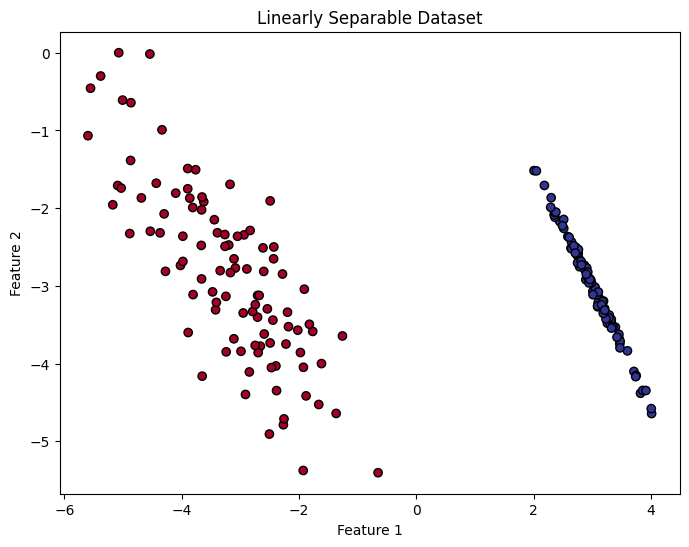

In [14]:
# now let's test it on a linearly separable dataset
from sklearn.datasets import make_classification
# Generate a linearly separable dataset
X_linear, y_linear = make_classification(n_samples=200, n_features=2,
                                         n_informative=2, n_redundant=0, class_sep=3.0,
                                         n_clusters_per_class=1, random_state=4)
# Reshape y_linear to be a column vector (m, 1)
y_linear = y_linear.reshape(-1, 1)
# Visualize the linearly separable dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Epoch 0, Cost: 0.23916022750531096
Epoch 100, Cost: 0.00040101138548946506
Epoch 200, Cost: 0.0002703547500526419
Epoch 300, Cost: 0.00020861973263687172
Epoch 400, Cost: 0.0001719818901803295
Epoch 500, Cost: 0.00014745128630485064
Epoch 600, Cost: 0.00012974669191792804
Epoch 700, Cost: 0.00011629572417400647
Epoch 800, Cost: 0.00010568760503063046
Epoch 900, Cost: 9.708050187109493e-05
Epoch 1000, Cost: 8.993926501804453e-05
Epoch 1100, Cost: 8.390650865066315e-05
Epoch 1200, Cost: 7.873393591780232e-05
Epoch 1300, Cost: 7.424335322153564e-05
Epoch 1400, Cost: 7.030336425256967e-05
Epoch 1500, Cost: 6.681482675577264e-05
Epoch 1600, Cost: 6.370144278065236e-05
Epoch 1700, Cost: 6.090347883317682e-05
Epoch 1800, Cost: 5.837346092276579e-05
Epoch 1900, Cost: 5.6073153399699623e-05
Epoch 2000, Cost: 5.39713944152834e-05
Epoch 2100, Cost: 5.204251633232439e-05
Epoch 2200, Cost: 5.026517387993318e-05
Epoch 2300, Cost: 4.862146182492979e-05
Epoch 2400, Cost: 4.709624166413963e-05
Epoch 25

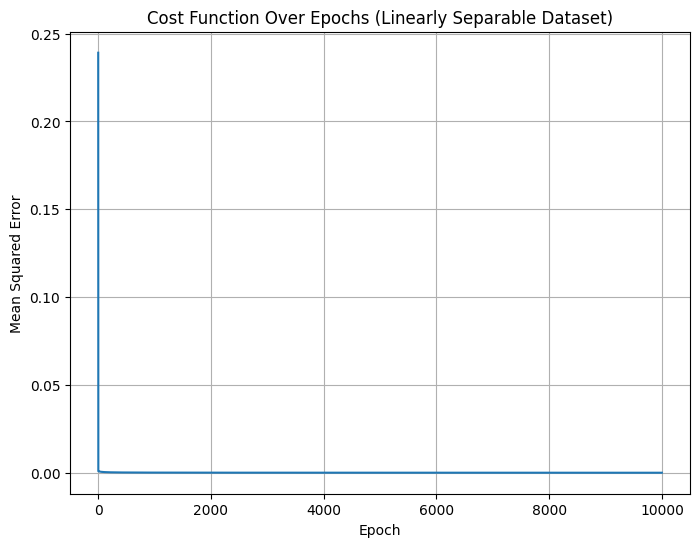

Final Accuracy on the linearly separable dataset: 100.00%


In [15]:
# train the neuron on the linearly separable dataset
trained_weights_linear, trained_bias_linear, cost_history_linear = train_neuron(X_linear, y_linear, learning_rate, num_epochs)

print("\n--- Training Complete on Linearly Separable Dataset ---")
print(f"Final Weights: \n{trained_weights_linear}")
print(f"Final Bias: {trained_bias_linear}")

# Plot the cost history for the linearly separable dataset
plt.figure(figsize=(8, 6))
plt.plot(cost_history_linear)
plt.title('Cost Function Over Epochs (Linearly Separable Dataset)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Evaluate the neuron on the linearly separable dataset
accuracy_linear = evaluate_neuron(X_linear, y_linear, trained_weights_linear, trained_bias_linear)
print(f"Final Accuracy on the linearly separable dataset: {accuracy_linear * 100:.2f}%")